<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


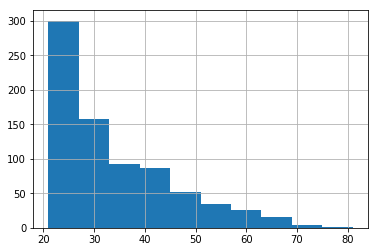

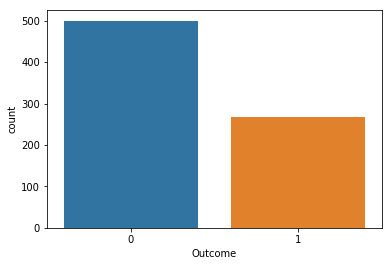

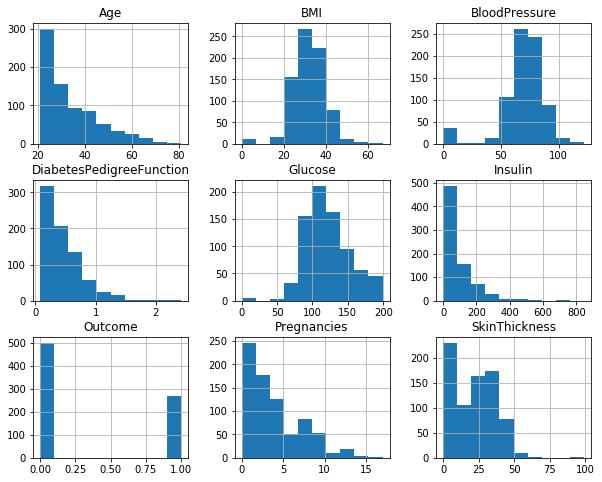

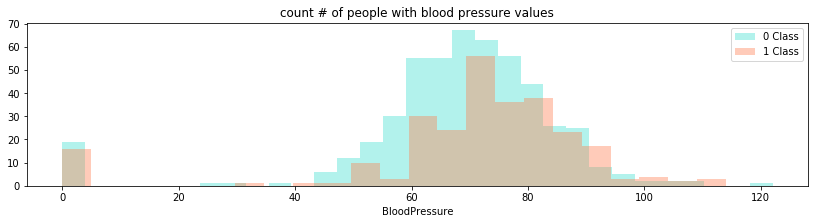

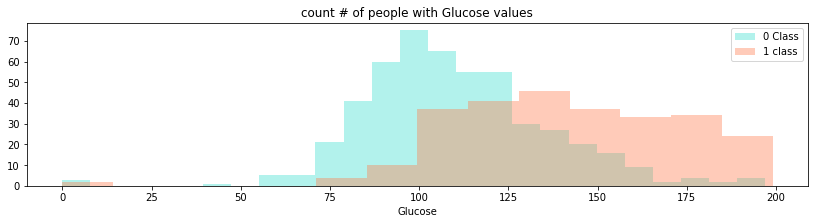

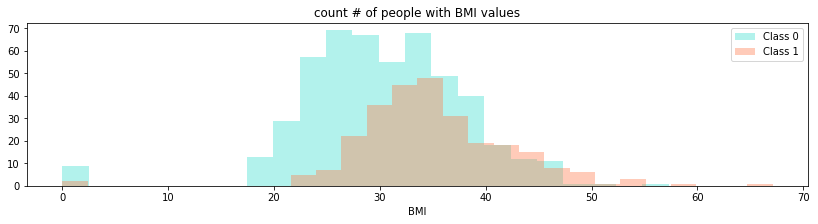

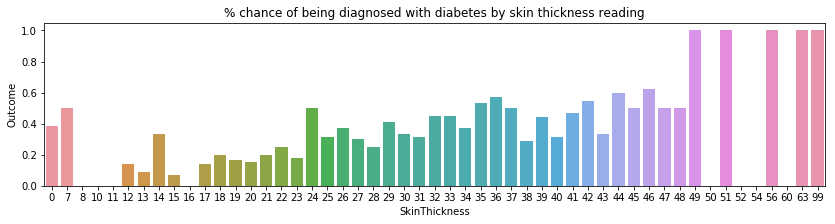

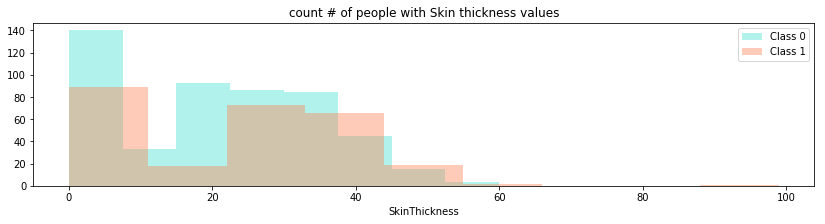

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64
Size of X_train is (614, 8)
Size of y_train is (614,)
Size of X_test is (154, 8)
Size of y_test is (154,)
[0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0

In [6]:

#==============================================================================
# Import libraries
#==============================================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


data_diabetes = pd.read_csv ('F:/ml/diabetes.csv')

data1 = data_diabetes.head(10)
#print(data1)

#print(data_diabetes.shape)  #(768, 9)

print(data_diabetes.info())


data_diabetes['Age'].hist()
plt.show()


#
sns.countplot(data_diabetes['Outcome'])   #show the count of observations in each category using bars
plt.show()




data_diabetes.hist(figsize=(10,8))
plt.show()





"""
sns.countplot(data_diabetes['Age'],label="Count")
#plt.show()

sns.countplot(data_diabetes['Pregnancies'],label="Count")
#plt.show()
"""

#Blood Pressure level
plt.figure(figsize=(14,3))

sns.distplot(data_diabetes[data_diabetes.Outcome == 0]['BloodPressure'], color='turquoise', kde=False, label='0 Class')
sns.distplot(data_diabetes[data_diabetes.Outcome == 1]['BloodPressure'], color='coral', kde=False, label='1 Class')
plt.legend()
plt.title('count # of people with blood pressure values')
plt.show()





# Glucose level
plt.figure(figsize=(14,3))
#glucose_pivot = data_diabetes.groupby('Glucose').Outcome.count().reset_index()
sns.distplot(data_diabetes[data_diabetes.Outcome == 0]['Glucose'], color='turquoise', kde=False, label='0 Class')
sns.distplot(data_diabetes[data_diabetes.Outcome == 1]['Glucose'], color='coral', kde=False, label='1 class')
plt.legend()
plt.title('count # of people with Glucose values')
plt.show()



# BMI
plt.figure(figsize=(14,3))
BMI_pivot = data_diabetes.groupby('BMI').Outcome.count().reset_index()
sns.distplot(data_diabetes[data_diabetes.Outcome == 0]['BMI'], color='turquoise', kde=False, label='Class 0')
sns.distplot(data_diabetes[data_diabetes.Outcome == 1]['BMI'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with BMI values')
plt.show()





plt.figure(figsize=(14,3))
SkinThickness_pivot = data_diabetes.groupby('SkinThickness').Outcome.mean().reset_index()
sns.barplot(SkinThickness_pivot.SkinThickness, SkinThickness_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by skin thickness reading')
plt.show()

plt.figure(figsize=(14,3))
SkinThickness_pivot = data_diabetes.groupby('SkinThickness').Outcome.count().reset_index()
sns.distplot(data_diabetes[data_diabetes.Outcome == 0]['SkinThickness'], color='turquoise', kde=False, label='Class 0')
sns.distplot(data_diabetes[data_diabetes.Outcome == 1]['SkinThickness'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with Skin thickness values')
plt.show()


############################################################################################################


#dependent and independent variables


#X = ['Pregnancies','Glucose','DiabetesPedigreeFunction','Insulin','BMI','Age']
X = data_diabetes.iloc[:,0:8]
print(X.head())

#Y=data_diabetes['Outcome']
Y=data_diabetes.iloc[:,8]
print(Y.head())

#==============================================================================
# split the dataset into training and test set. We will use 75/25 approach
#==============================================================================


from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, Y, test_size = .20)

													 
#print("splitting done")
#print(X_train)		
#print(y_train)	
#print(X_test)	
print("Size of X_train is",X_train.shape)
print("Size of y_train is",y_train.shape)
print("Size of X_test is",X_test.shape)
print("Size of y_test is",y_test.shape)


#==============================================================================
# Fit the Logistic regression to the train data. Logistic regression is a 
# linear classifier after which the data is divided by a straight line.
#==============================================================================
from sklearn.linear_model import LogisticRegression
LRClassifier = LogisticRegression (random_state = 85)
LRClassifier.fit (X_train, y_train)

#==============================================================================
# Predict the values 
#==============================================================================

prediction = LRClassifier.predict (X_test)
print(prediction)




In [4]:
from sklearn.metrics import accuracy_score

print("Accuracy is",accuracy_score(y_test, prediction))

SkinThickness_pivot = data_diabetes.groupby('SkinThickness').Outcome.mean().reset_index()
#sns.barplot(SkinThickness_pivot.SkinThickness, SkinThickness_pivot.Outcome)
#plt.title('% chance of being diagnosed with diabetes by skin thickness reading')
#plt.show()

Accuracy is 0.753246753247


,SkinThickness,Outcome
0,0,227
1,7,2
2,8,2
3,10,5
4,11,6
5,12,7
6,13,11
7,14,6
8,15,14
9,16,6
